In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
df_selected = pd.read_excel(".\input\selected_catagories.xlsx")
list_selected = df_selected['Element ID'].unique()
print('Total selected = ' + str(len(list_selected)))
list_selected

Total selected = 34


array(['1.A.1.a.1', '1.A.1.a.2', '1.A.1.a.4', '1.A.1.b.1', '1.A.1.b.2',
       '1.A.1.b.3', '1.A.1.b.4', '1.A.1.b.5', '1.A.1.b.6', '1.A.1.b.7',
       '1.A.1.c.1', '1.A.1.c.2', '1.A.1.d.1', '1.A.1.e.1', '1.A.1.e.2',
       '1.A.1.e.3', '2.A.1.e', '2.A.1.f', '2.A.2.a', '2.A.2.b', '2.B.2.i',
       '2.B.3.e', '2.B.4.e', '2.B.4.g', '2.B.4.h', '4.A.1.a.2',
       '4.A.2.a.1', '4.A.2.a.2', '4.A.2.a.3', '4.A.2.a.4', '4.A.2.b.1',
       '4.A.2.b.2', '4.A.2.b.3', '4.A.2.b.4'], dtype=object)

In [3]:
cd U:\joint-Gueyon\data_work\input\year_2016

U:\joint-Gueyon\data_work\input\year_2016


In [4]:
df_abilities = pd.read_excel("Abilities.xlsx")
df_abilities = df_abilities[df_abilities['Scale ID'] == 'IM']
df_abilities = df_abilities[['O*NET-SOC Code','Title','Element ID','Element Name', 'Data Value']]
df_abilities = df_abilities[df_abilities['Element ID'].isin(list_selected)]

In [5]:
df_skills = pd.read_excel("Skills.xlsx")
df_skills = df_skills[df_skills['Scale ID'] == 'IM']
df_skills = df_skills[['O*NET-SOC Code','Title','Element ID','Element Name', 'Data Value']]
df_skills = df_skills[df_skills['Element ID'].isin(list_selected)]

In [6]:
df_work = pd.read_excel("Work Activities.xlsx")
df_work = df_work[df_work['Scale ID'] == 'IM']
df_work = df_work[['O*NET-SOC Code','Title','Element ID','Element Name', 'Data Value']]
df_work = df_work[df_work['Element ID'].isin(list_selected)]

In [7]:
df = df_abilities.append([df_skills, df_work], ignore_index = True)
df = df.rename(columns = {'O*NET-SOC Code':'soc','Title':'title','Element ID':'element_id','Element Name':'element_name', 'Data Value':'raw_value'})

df_avg = df[['element_id','raw_value']].groupby('element_id', axis=0).mean()
df_avg = df_avg.rename(columns = {'raw_value':'avg_value'}).reset_index()
df_std = df[['element_id','raw_value']].groupby('element_id', axis=0).std()
df_std = df_std.rename(columns = {'raw_value':'std_value'}).reset_index()

df = df.merge(df_avg, how = 'left', on='element_id', left_index=True, right_index=False)
df = df.merge(df_std, how = 'left', on='element_id', left_index=True, right_index=False)

df['value'] = (df['raw_value'] - df['avg_value']) / df['std_value']

df_avg_new = df[['element_id','value']].groupby('element_id', axis=0).mean()
df_avg_new = df_avg_new.rename(columns = {'value':'new_avg_value'}).reset_index()
df_std_new = df[['element_id','value']].groupby('element_id', axis=0).std()
df_std_new = df_std_new.rename(columns = {'value':'new_std_value'}).reset_index()

n_df = len(df)
n_soc = len(df.soc.unique())
n_elem = len(df.element_id.unique())

df = df.merge(df_avg_new, how = 'left', on='element_id', left_index=True, right_index=False)
df = df.merge(df_std_new, how = 'left', on='element_id', left_index=True, right_index=False)

print('total obs = ' + str(n_df))
print('total soc = ' + str(n_soc))
print('total element = ' + str(n_elem))

df

total obs = 32776
total soc = 964
total element = 34


,soc,title,element_id,element_name,raw_value,avg_value,std_value,value,new_avg_value,new_std_value
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,4.50,3.732137,0.417890,1.837475,-6.203198e-15,1.0
1,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,4.25,3.510529,0.563640,1.311956,-2.337342e-15,1.0
2,11-1011.00,Chief Executives,1.A.1.a.4,Written Expression,4.12,3.293361,0.601733,1.373764,-9.884555e-15,1.0
3,11-1011.00,Chief Executives,1.A.1.b.1,Fluency of Ideas,3.88,2.858703,0.510244,2.001583,-1.397338e-14,1.0
4,11-1011.00,Chief Executives,1.A.1.b.2,Originality,3.88,2.798216,0.520451,2.078550,-1.624386e-14,1.0
5,11-1011.00,Chief Executives,1.A.1.b.3,Problem Sensitivity,4.00,3.613589,0.396504,0.974545,-1.985675e-14,1.0
6,11-1011.00,Chief Executives,1.A.1.b.4,Deductive Reasoning,4.12,3.494170,0.428085,1.461927,-9.924519e-15,1.0
7,11-1011.00,Chief Executives,1.A.1.b.5,Inductive Reasoning,4.00,3.419720,0.471997,1.229415,-1.735426e-14,1.0
8,11-1011.00,Chief Executives,1.A.1.b.6,Information Ordering,3.62,3.355467,0.320989,0.824120,8.282909e-16,1.0
9,11-1011.00,Chief Executives,1.A.1.b.7,Category Flexibility,3.50,3.119813,0.312364,1.217128,-1.175380e-14,1.0


In [8]:
df_matrix = df[['soc','element_id','value']].pivot(index='soc', columns='element_id', values='value')
df_matrix

element_id,1.A.1.a.1,1.A.1.a.2,1.A.1.a.4,1.A.1.b.1,1.A.1.b.2,1.A.1.b.3,1.A.1.b.4,1.A.1.b.5,1.A.1.b.6,1.A.1.b.7,...,2.B.4.h,4.A.1.a.2,4.A.2.a.1,4.A.2.a.2,4.A.2.a.3,4.A.2.a.4,4.A.2.b.1,4.A.2.b.2,4.A.2.b.3,4.A.2.b.4
soc,,,,,,,,,,,,,,,,,,,,,
11-1011.00,1.837475,1.311956,1.373764,2.001583,2.078550,0.974545,1.461927,1.229415,0.824120,1.217128,...,2.670484,0.321698,2.291213,0.806129,1.231459,1.360952,1.595949,0.750538,0.589254,2.459502
11-1011.03,0.640989,0.868410,0.974916,1.492023,1.578983,0.671900,1.181610,1.229415,0.450275,0.832961,...,1.784953,-0.470995,0.331987,0.169008,1.067323,0.672275,1.088027,1.694482,1.094877,2.148929
11-1021.00,0.640989,0.868410,1.174340,0.276920,0.387710,0.974545,0.597614,-0.635004,0.450275,-0.383570,...,0.686893,1.075724,1.673631,0.691774,0.886774,0.483226,0.970814,-0.045915,-0.160462,1.184520
11-2011.00,0.928145,0.655509,0.974916,1.746803,1.828767,0.671900,0.901292,0.170086,0.076430,0.832961,...,0.686893,-1.940378,-0.860585,0.021980,-1.591671,-0.732088,0.990350,1.753478,0.188243,1.119136
11-2021.00,0.640989,0.868410,0.974916,1.746803,1.578983,0.016168,0.901292,0.699751,-0.328569,0.416779,...,1.572425,-0.470995,0.204211,-0.288413,-1.411122,0.537240,0.814531,1.370001,0.188243,1.756627
11-2022.00,0.640989,0.868410,0.974916,1.746803,1.578983,0.344034,0.901292,0.699751,0.076430,0.416779,...,1.784953,-1.573033,0.055140,0.185344,-0.836648,0.753295,0.326145,1.487994,0.188243,1.789319
11-2031.00,0.928145,1.081312,1.589807,1.746803,1.348414,0.974545,0.597614,0.699751,0.450275,0.832961,...,1.572425,0.437702,0.715314,-0.174058,-1.066438,0.321184,0.560570,1.620736,0.066196,1.511438
11-3011.00,0.640989,0.868410,1.174340,0.041738,0.157141,0.016168,0.013618,0.170086,-0.328569,0.000598,...,0.244127,-0.296989,1.439375,0.512073,0.148165,-0.029907,0.443357,-0.134410,-0.857873,-0.106808
11-3021.00,0.640989,0.868410,0.758873,1.021661,0.868062,0.974545,1.181610,1.229415,1.229119,0.416779,...,1.784953,0.534372,1.247712,0.659101,0.410781,1.212414,1.146633,0.337562,0.292855,1.625860


In [9]:
X = np.matrix(df_matrix)
pca = PCA(n_components=1)
X_r = -pca.fit_transform(X)

In [10]:
loadings = -pca.components_[0]
df_loadings = df[['element_id','element_name']].drop_duplicates().reset_index(drop = True)
df_loadings['loadings'] = list(loadings)
df_loadings

,element_id,element_name,loadings
0,1.A.1.a.1,Oral Comprehension,0.166343
1,1.A.1.a.2,Written Comprehension,0.191193
2,1.A.1.a.4,Written Expression,0.188473
3,1.A.1.b.1,Fluency of Ideas,0.190136
4,1.A.1.b.2,Originality,0.177551
5,1.A.1.b.3,Problem Sensitivity,0.174694
6,1.A.1.b.4,Deductive Reasoning,0.209656
7,1.A.1.b.5,Inductive Reasoning,0.205917
8,1.A.1.b.6,Information Ordering,0.180808
9,1.A.1.b.7,Category Flexibility,0.178112


In [11]:
min_pca = min(X_r)
max_pca = max(X_r)
adjusted = (X_r - min_pca) / (max_pca-min_pca)

df_complexity = df[['soc','title']].drop_duplicates()
df_complexity['complexity'] = adjusted
df_complexity = df_complexity.sort_values('complexity', axis=0, ascending=False).reset_index(drop = True)

def assign_soc6(soc):
    if str(soc[8:]) == '00':
        soc6 = str(soc[:7])
    else:
        soc6 = '00-0000'
        soc6 = str(soc[:7])
    return soc6
        
df_complexity['soc6'] = df_complexity['soc'].apply(lambda x: assign_soc6(x))
df_complexity

,soc,title,complexity,soc6
0,19-2012.00,Physicists,1.000000,19-2012
1,11-1011.00,Chief Executives,0.980268,11-1011
2,19-1041.00,Epidemiologists,0.973059,19-1041
3,19-3039.01,Neuropsychologists and Clinical Neuropsycholog...,0.968612,19-3039
4,29-1069.04,Neurologists,0.968262,29-1069
5,19-1029.02,Molecular and Cellular Biologists,0.965103,19-1029
6,19-1021.00,Biochemists and Biophysicists,0.962386,19-1021
7,29-1069.09,Preventive Medicine Physicians,0.954779,29-1069
8,19-1029.03,Geneticists,0.946954,19-1029
9,19-1029.01,Bioinformatics Scientists,0.939444,19-1029


In [12]:
df_emp = pd.read_excel("bls_2016.xlsx")
df_emp.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,A_MEAN
0,00-0000,All Occupations,total,140400040,49630
1,11-0000,Management Occupations,major,7090790,118020
2,11-1000,Top Executives,minor,2465800,126950
3,11-1010,Chief Executives,broad,223260,194350
4,11-1011,Chief Executives,detailed,223260,194350


In [13]:
df_emp = df_emp[['OCC_CODE','TOT_EMP']][df_emp['OCC_GROUP'] == 'detailed']
df_emp = df_emp.rename(columns = {'OCC_CODE':'soc6','TOT_EMP':'emp'}).reset_index(drop = True)
df_emp

,soc6,emp
0,11-1011,223260
1,11-1021,2188870
2,11-1031,53670
3,11-2011,28860
4,11-2021,205900
5,11-2022,365230
6,11-2031,63970
7,11-3011,266280
8,11-3021,352510
9,11-3031,543300


In [14]:
df_complexity_weighted = df_complexity.merge(df_emp, how = 'left', on='soc6').reset_index(drop=True)  
df_complexity_weighted = df_complexity_weighted[df_complexity_weighted['soc6'] != '00-0000']

df_complexity_weighted['tot_emp'] = df_complexity_weighted['emp'].sum()
df_complexity_weighted['weight'] = df_complexity_weighted['emp'] / df_complexity_weighted['tot_emp'] 

df_complexity_weighted.to_csv('complexity_weighted.csv', index = False)
df_complexity_weighted

,soc,title,complexity,soc6,emp,tot_emp,weight
0,19-2012.00,Physicists,1.000000,19-2012,16680.0,193664530.0,0.000086
1,11-1011.00,Chief Executives,0.980268,11-1011,223260.0,193664530.0,0.001153
2,19-1041.00,Epidemiologists,0.973059,19-1041,5690.0,193664530.0,0.000029
3,19-3039.01,Neuropsychologists and Clinical Neuropsycholog...,0.968612,19-3039,13310.0,193664530.0,0.000069
4,29-1069.04,Neurologists,0.968262,29-1069,338620.0,193664530.0,0.001748
5,19-1029.02,Molecular and Cellular Biologists,0.965103,19-1029,35110.0,193664530.0,0.000181
6,19-1021.00,Biochemists and Biophysicists,0.962386,19-1021,29200.0,193664530.0,0.000151
7,29-1069.09,Preventive Medicine Physicians,0.954779,29-1069,338620.0,193664530.0,0.001748
8,19-1029.03,Geneticists,0.946954,19-1029,35110.0,193664530.0,0.000181
9,19-1029.01,Bioinformatics Scientists,0.939444,19-1029,35110.0,193664530.0,0.000181


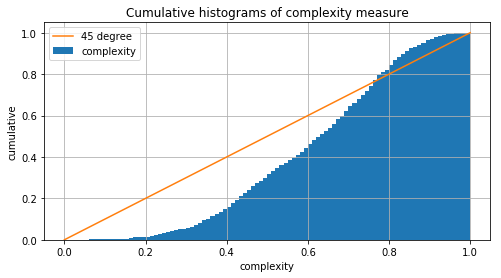

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

x = df_complexity_weighted.complexity
w = df_complexity_weighted.weight

ax.hist(x, bins = 100, cumulative = True, density = True, label='complexity')
ax.plot(x,x, label='45 degree')
ax.grid(True)
ax.legend(loc='best')
ax.set_title('Cumulative histograms of complexity measure')
ax.set_xlabel('complexity')
ax.set_ylabel('cumulative')
plt.show()

In [16]:
df_matrix

element_id,1.A.1.a.1,1.A.1.a.2,1.A.1.a.4,1.A.1.b.1,1.A.1.b.2,1.A.1.b.3,1.A.1.b.4,1.A.1.b.5,1.A.1.b.6,1.A.1.b.7,...,2.B.4.h,4.A.1.a.2,4.A.2.a.1,4.A.2.a.2,4.A.2.a.3,4.A.2.a.4,4.A.2.b.1,4.A.2.b.2,4.A.2.b.3,4.A.2.b.4
soc,,,,,,,,,,,,,,,,,,,,,
11-1011.00,1.837475,1.311956,1.373764,2.001583,2.078550,0.974545,1.461927,1.229415,0.824120,1.217128,...,2.670484,0.321698,2.291213,0.806129,1.231459,1.360952,1.595949,0.750538,0.589254,2.459502
11-1011.03,0.640989,0.868410,0.974916,1.492023,1.578983,0.671900,1.181610,1.229415,0.450275,0.832961,...,1.784953,-0.470995,0.331987,0.169008,1.067323,0.672275,1.088027,1.694482,1.094877,2.148929
11-1021.00,0.640989,0.868410,1.174340,0.276920,0.387710,0.974545,0.597614,-0.635004,0.450275,-0.383570,...,0.686893,1.075724,1.673631,0.691774,0.886774,0.483226,0.970814,-0.045915,-0.160462,1.184520
11-2011.00,0.928145,0.655509,0.974916,1.746803,1.828767,0.671900,0.901292,0.170086,0.076430,0.832961,...,0.686893,-1.940378,-0.860585,0.021980,-1.591671,-0.732088,0.990350,1.753478,0.188243,1.119136
11-2021.00,0.640989,0.868410,0.974916,1.746803,1.578983,0.016168,0.901292,0.699751,-0.328569,0.416779,...,1.572425,-0.470995,0.204211,-0.288413,-1.411122,0.537240,0.814531,1.370001,0.188243,1.756627
11-2022.00,0.640989,0.868410,0.974916,1.746803,1.578983,0.344034,0.901292,0.699751,0.076430,0.416779,...,1.784953,-1.573033,0.055140,0.185344,-0.836648,0.753295,0.326145,1.487994,0.188243,1.789319
11-2031.00,0.928145,1.081312,1.589807,1.746803,1.348414,0.974545,0.597614,0.699751,0.450275,0.832961,...,1.572425,0.437702,0.715314,-0.174058,-1.066438,0.321184,0.560570,1.620736,0.066196,1.511438
11-3011.00,0.640989,0.868410,1.174340,0.041738,0.157141,0.016168,0.013618,0.170086,-0.328569,0.000598,...,0.244127,-0.296989,1.439375,0.512073,0.148165,-0.029907,0.443357,-0.134410,-0.857873,-0.106808
11-3021.00,0.640989,0.868410,0.758873,1.021661,0.868062,0.974545,1.181610,1.229415,1.229119,0.416779,...,1.784953,0.534372,1.247712,0.659101,0.410781,1.212414,1.146633,0.337562,0.292855,1.625860


In [17]:
complexity2 = list(df_matrix.mean(axis = 1))
adjusted = (complexity2 - min(complexity2)) / (max(complexity2) - min(complexity2))

df_complexity_weighted['complexity2'] =  adjusted

df_complexity_weighted

,soc,title,complexity,soc6,emp,tot_emp,weight,complexity2
0,19-2012.00,Physicists,1.000000,19-2012,16680.0,193664530.0,0.000086,0.974145
1,11-1011.00,Chief Executives,0.980268,11-1011,223260.0,193664530.0,0.001153,0.802078
2,19-1041.00,Epidemiologists,0.973059,19-1041,5690.0,193664530.0,0.000029,0.714023
3,19-3039.01,Neuropsychologists and Clinical Neuropsycholog...,0.968612,19-3039,13310.0,193664530.0,0.000069,0.712175
4,29-1069.04,Neurologists,0.968262,29-1069,338620.0,193664530.0,0.001748,0.771902
5,19-1029.02,Molecular and Cellular Biologists,0.965103,19-1029,35110.0,193664530.0,0.000181,0.777852
6,19-1021.00,Biochemists and Biophysicists,0.962386,19-1021,29200.0,193664530.0,0.000151,0.768538
7,29-1069.09,Preventive Medicine Physicians,0.954779,29-1069,338620.0,193664530.0,0.001748,0.635422
8,19-1029.03,Geneticists,0.946954,19-1029,35110.0,193664530.0,0.000181,0.841216
9,19-1029.01,Bioinformatics Scientists,0.939444,19-1029,35110.0,193664530.0,0.000181,0.890997


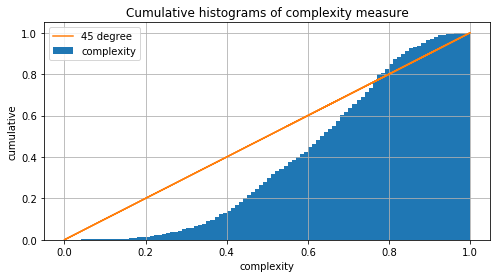

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))

x = df_complexity_weighted.complexity2
x = (x - min(x)) / (max(x)-min(x))

ax.hist(x, bins = 100, cumulative = True, density = True, label='complexity')
ax.plot(x,x, label='45 degree')
ax.grid(True)
ax.legend(loc='best')
ax.set_title('Cumulative histograms of complexity measure')
ax.set_xlabel('complexity')
ax.set_ylabel('cumulative')
plt.show()